#Install dan Import Library

In [ ]:
!pip install sastrawi
!pip install emoji
!pip install stopword
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import emoji
import stopword
import Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from google.colab import drive
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

#import Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/datasetfull.csv', encoding='utf-8')
df

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-03-15T04:29:42Z,@Mercu-e9w,Wah megatrus itu kagak ada pak.,0
1,2025-02-06T01:12:05Z,@bagassoekarno,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,0
2,2025-02-05T01:39:21Z,@RiskyDrake,Rasakan itu,0
3,2025-01-14T10:44:06Z,@Idabaguswira-x9y,"Harus terus waspada,bukan untuk menakuti masya...",0
4,2025-01-08T06:48:01Z,@NadiaAsyiffaAzahraa2345,Komen terakhir,0
...,...,...,...,...
5923,2024-08-18T06:10:04Z,@slamethandoko1580,Daryono sdh spt tuhan,1
5924,2024-08-18T06:15:27Z,@ridhobaihaqi144,Ciri khas SDM negara berkembang dan akan terus...,1
5925,2024-08-18T07:08:06Z,@1789NYSA,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,0
5926,2024-08-18T07:28:45Z,@anticras,Komen sdm rendah,0


#Preprocessing Data

##Cleaning Data

In [ ]:
#Hapus kolom yang tidak diperlukan
df = df.drop(columns = ['publishedAt','authorDisplayName','likeCount'])
df

,textDisplay
0,Wah megatrus itu kagak ada pak.
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...
2,Rasakan itu
3,"Harus terus waspada,bukan untuk menakuti masya..."
4,Komen terakhir
...,...
5923,Daryono sdh spt tuhan
5924,Ciri khas SDM negara berkembang dan akan terus...
5925,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...
5926,Komen sdm rendah


In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.strip()
    text = re.sub(r'<a\s+href="[^"]*">?', '', text)  # hapus tag <a>
    text = re.sub(r'http\S+', '', text)  # hapus URL
    text = re.sub(r'<br\s*/?>', '', text)  # hapus <br>
    text = re.sub(r'&\w+;', '', text)  # hapus HTML entities
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # hapus hashtag
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\s+', ' ', text)  # hapus spasi berlebih
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # hapus karakter non-ASCII
    return text.strip()

# Terapkan fungsi pembersihan
df['clean_text'] = df['textDisplay'].apply(clean_text)

# Hapus nilai kosong atau hanya spasi
df = df[df['clean_text'].str.strip() != '']

# Hapus duplikat berdasarkan kolom clean_text
df = df.drop_duplicates(subset='clean_text').reset_index(drop=True)

df

,textDisplay,clean_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...
2,Rasakan itu,Rasakan itu
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...
4,Komen terakhir,Komen terakhir
...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...


In [ ]:
df[['clean_text']].to_csv('Hasil_CleanText.csv', index=False)

In [ ]:
#lower case
def casefolding(text) :
  text = text.lower()
  return text

df['lower_text'] = df['clean_text'].apply(casefolding)
df

,textDisplay,clean_text,lower_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...
2,Rasakan itu,Rasakan itu,rasakan itu
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...
4,Komen terakhir,Komen terakhir,komen terakhir
...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...


In [ ]:
df[['lower_text']].to_csv('Hasil_LowerText.csv', index=False)

##Normalisasi

In [ ]:
import re

# Fungsi untuk mengganti kata tidak baku dalam teks dengan kata baku dari kamus
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = re.findall(r'\b\w+\b', text)

        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]

                # Pastikan baku_word adalah string
                if isinstance(baku_word, str):
                    replaced_words.extend(baku_word.split())
                else:
                    # Jika bukan string, ubah ke string atau abaikan
                    replaced_words.append(str(baku_word))

                kalimat_baku.append(baku_word)
                kata_diganti.append(word)
                kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
#definisikan kamus
kamus = pd.read_csv('kamus_normalisasi.csv')
kamus_tidak_baku = dict(zip(kamus['words'], kamus['kata baku']))
kamus

,words,kata baku
0,yg,yang
1,gak,tidak
2,alloh,allah
3,ga,tidak
4,tdk,tidak
...,...,...
8219,alaram,alarm
8220,alatya,alatnya
8221,zinaah,berzina
8222,zinah,berzina


In [ ]:
# Terapkan fungsi penggantian kata tidak baku
df['normalize_text'], df['Kata_Baku'], df['kata_tidak_baku'], df['Kata_Tidak_Baku_Hash'] = zip(*df['lower_text'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))


df =  pd.DataFrame(df[['textDisplay','clean_text','lower_text','normalize_text']])
df

,textDisplay,clean_text,lower_text,normalize_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir
...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...


In [ ]:
df[['normalize_text']].to_csv('Hasil_NormalizeText.csv', index=False)

##Tokenize

In [ ]:
nltk.download('punkt_tab')
df['tokenized_text'] = df['normalize_text'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,textDisplay,clean_text,lower_text,normalize_text,tokenized_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"[wah, megathrust, itu, tidak, ada, pak]"
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"[bmkg, hendaknya, memberikan, data, data, tekn..."
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"[rasakan, itu]"
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"[harus, terus, waspada, bukan, untuk, menakuti..."
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"[komen, terakhir]"
...,...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"[yakin, kuat]"
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"[daryono, sudah, seperti, tuhan]"
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"[ciri, khas, sumber, daya, manusia, negara, be..."
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"[setuju, sekali, yang, buat, miris, bagi, saya..."


In [ ]:
df[['tokenized_text']].to_csv('tokenized_text.csv', index=False)

##Stopword Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Load stopwords dari file CSV
custom_stopwords_df = pd.read_csv('kamus_stopword.csv')
custom_stopwords = set(custom_stopwords_df['word'].dropna().tolist())

# Daftar kata yang tidak boleh dihapus (exceptions)
exception_words = {'tolong', 'tidak', 'bisa','ada'}

# Buat objek stopword remover dari Sastrawi
factory = StopWordRemoverFactory()
sastrawi_stopwords = set(factory.get_stop_words())

# Hapus kata exception dari daftar stopword bawaan dan custom
sastrawi_stopwords -= exception_words
custom_stopwords -= exception_words

# Gabungkan semua stopword yang telah dibersihkan dari exception
all_stopwords = sastrawi_stopwords.union(custom_stopwords)

# Fungsi pemrosesan teks
def proces_text(text):
    if isinstance(text, list):  # Kalau berupa list token
        text = ' '.join(text)
    words = text.split()
    filtered_words = [word for word in words if word not in all_stopwords]
    return ' '.join(filtered_words)

# Terapkan ke DataFrame
df['stopword_text'] = df['tokenized_text'].apply(proces_text)

In [ ]:
df['stopword_text'].to_csv('stopword.csv', index = False)

In [ ]:
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"[wah, megathrust, itu, tidak, ada, pak]",megathrust tidak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"[bmkg, hendaknya, memberikan, data, data, tekn...",bmkg hendaknya memberikan data data teknis ter...
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"[rasakan, itu]",rasakan
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"[harus, terus, waspada, bukan, untuk, menakuti...",terus waspada bukan menakuti masyarakat
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"[komen, terakhir]",komen terakhir
...,...,...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"[yakin, kuat]",yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"[daryono, sudah, seperti, tuhan]",tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"[ciri, khas, sumber, daya, manusia, negara, be...",ciri khas sumber daya manusia negara berkemban...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"[setuju, sekali, yang, buat, miris, bagi, saya...",setuju sekali buat miris padahal mengaku sanga...


##Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Define StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text_cleanning) :
  text = stemmer.stem(text_cleanning)
  return text

df['stemming_text'] = df['stopword_text'].apply(stemming)
df


,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"[wah, megathrust, itu, tidak, ada, pak]",megathrust tidak ada pak,megathrust tidak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"[bmkg, hendaknya, memberikan, data, data, tekn...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"[rasakan, itu]",rasakan,rasa
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"[harus, terus, waspada, bukan, untuk, menakuti...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"[komen, terakhir]",komen terakhir,komen akhir
...,...,...,...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"[yakin, kuat]",yakin kuat,yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"[daryono, sudah, seperti, tuhan]",tuhan,tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"[ciri, khas, sumber, daya, manusia, negara, be...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"[setuju, sekali, yang, buat, miris, bagi, saya...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...


In [ ]:
#hilangkan Nan
df = df.dropna(subset = ['stemming_text'])

#hilangkan string kosong atau spasi saja
df = df[df['stemming_text'].str.strip() != '']

In [ ]:
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"[wah, megathrust, itu, tidak, ada, pak]",megathrust tidak ada pak,megathrust tidak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"[bmkg, hendaknya, memberikan, data, data, tekn...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"[rasakan, itu]",rasakan,rasa
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"[harus, terus, waspada, bukan, untuk, menakuti...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"[komen, terakhir]",komen terakhir,komen akhir
...,...,...,...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"[yakin, kuat]",yakin kuat,yakin kuat
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"[daryono, sudah, seperti, tuhan]",tuhan,tuhan
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"[ciri, khas, sumber, daya, manusia, negara, be...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"[setuju, sekali, yang, buat, miris, bagi, saya...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...


In [ ]:
#import hasil stemming ke csv
df.to_csv('hasil_stemming.csv', index = False)

In [ ]:
df = pd.read_csv('hasil_stemming (2).csv')

#Labeling

In [ ]:
#import senticnet
label_xls = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/senticnet.xlsx')
label_df = pd.DataFrame(label_xls)
lexicon_dict = dict(zip(label_df['CONCEPT'], label_df['POLARITY INTENSITY']))

In [ ]:
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"['wah', 'megathrust', 'itu', 'tidak', 'ada', '...",megathrust tidak ada pak,megathrust tidak ada pak
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"['bmkg', 'hendaknya', 'memberikan', 'data', 'd...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"['rasakan', 'itu']",rasakan,rasa
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"['harus', 'terus', 'waspada', 'bukan', 'untuk'...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"['komen', 'terakhir']",komen terakhir,komen akhir
...,...,...,...,...,...,...,...
5695,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"['yakin', 'kuat']",yakin kuat,yakin kuat
5696,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"['daryono', 'sudah', 'seperti', 'tuhan']",tuhan,tuhan
5697,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"['ciri', 'khas', 'sumber', 'daya', 'manusia', ...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...
5698,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"['setuju', 'sekali', 'yang', 'buat', 'miris', ...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...


In [ ]:
df['tokenized_stemming'] = df['stemming_text'].apply(word_tokenize)

def merge_phrases(tokens, label_mapping):
    merged = []
    i = 0
    while i < len(tokens):
        # Coba trigram dulu
        if i + 2 < len(tokens):
            trigram = f"{tokens[i]}_{tokens[i+1]}_{tokens[i+2]}"
            if trigram in label_mapping:
                merged.append(trigram)
                i += 3
                continue
        # Coba bigram
        if i + 1 < len(tokens):
            bigram = f"{tokens[i]}_{tokens[i+1]}"
            if bigram in label_mapping:
                merged.append(bigram)
                i += 2
                continue
        # Kalau tidak ada yang cocok
        merged.append(tokens[i])
        i += 1
    return merged

df['hasil_merge_senticnet'] = df['tokenized_stemming'].apply(lambda x: merge_phrases(x, lexicon_dict))

#buat liat kata yang diganti
df['hasil_underscore'] = df['hasil_merge_senticnet'].apply(lambda x: [word for word in x if '_' in word])
df.to_csv('hasil_underscore.csv', index = False, header = True,index_label=None)
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text,tokenized_stemming,hasil_merge_senticnet,hasil_underscore
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"['wah', 'megathrust', 'itu', 'tidak', 'ada', '...",megathrust tidak ada pak,megathrust tidak ada pak,"[megathrust, tidak, ada, pak]","[megathrust, tidak_ada, pak]",[tidak_ada]
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"['bmkg', 'hendaknya', 'memberikan', 'data', 'd...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...,"[bmkg, hendak, beri, data, data, teknis, jadi,...","[bmkg, hendak, beri, data, data, teknis, jadi,...",[gempa_bumi]
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"['rasakan', 'itu']",rasakan,rasa,[rasa],[rasa],[]
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"['harus', 'terus', 'waspada', 'bukan', 'untuk'...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat,"[terus, waspada, bukan, takut, masyarakat]","[terus, waspada, bukan, takut, masyarakat]",[]
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"['komen', 'terakhir']",komen terakhir,komen akhir,"[komen, akhir]","[komen, akhir]",[]
...,...,...,...,...,...,...,...,...,...,...
5695,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"['yakin', 'kuat']",yakin kuat,yakin kuat,"[yakin, kuat]","[yakin, kuat]",[]
5696,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"['daryono', 'sudah', 'seperti', 'tuhan']",tuhan,tuhan,[tuhan],[tuhan],[]
5697,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"['ciri', 'khas', 'sumber', 'daya', 'manusia', ...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...,"[ciri, khas, sumber, daya, manusia, negara, ke...","[ciri_khas, sumber, daya, manusia, negara, kem...",[ciri_khas]
5698,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"['setuju', 'sekali', 'yang', 'buat', 'miris', ...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...,"[tuju, sekali, buat, miris, padahal, aku, sang...","[tuju, sekali, buat, miris, padahal, aku, sang...",[]


In [ ]:
# Membuat fungsi untuk pemberian score dengan label netral masuk ke dalam positif
def sentimen_lexicon(text):
    score = []
    polarity = ''

    for word in text:
        if word in lexicon_dict:
            score.append(float(lexicon_dict.get(word)))

    # Jika skor >= 0 maka positif, sisanya negatif
    if sum(score) >= 0:
        polarity = 'positive'
    else:
        polarity = 'negative'

    return polarity, sum(score)

In [ ]:
label_result = df['hasil_merge_senticnet'].apply(sentimen_lexicon) # Menerapkan fungsi 'sentimen_lexicon' pada setiap teks di kolom 'the_correct_senticnet'
label_result = list(zip(*label_result)) # Memisahkan hasil tuple (polaritas, skor polaritas) dan mengubahnya menjadi daftar

df['polarity'] = label_result[0] ## Menambahkan kolom 'polarity' dengan nilai polaritas
df['polarity_score'] = label_result[1] # Menambahkan kolom 'polarity_score' dengan nilai skor polaritas


In [ ]:
label_result = df['hasil_merge_senticnet'].apply(sentimen_lexicon)
label_result = list(zip(*label_result))

df['polarity'] = label_result[0]
df['polarity_score'] = label_result[1]


In [ ]:
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text,tokenized_stemming,hasil_merge_senticnet,hasil_underscore,polarity,polarity_score
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"['wah', 'megathrust', 'itu', 'tidak', 'ada', '...",megathrust tidak ada pak,megathrust tidak ada pak,"[megathrust, tidak, ada, pak]","[megathrust, tidak_ada, pak]",[tidak_ada],negative,-1.048
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"['bmkg', 'hendaknya', 'memberikan', 'data', 'd...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...,"[bmkg, hendak, beri, data, data, teknis, jadi,...","[bmkg, hendak, beri, data, data, teknis, jadi,...",[gempa_bumi],negative,-0.605
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"['rasakan', 'itu']",rasakan,rasa,[rasa],[rasa],[],positive,0.271
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"['harus', 'terus', 'waspada', 'bukan', 'untuk'...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat,"[terus, waspada, bukan, takut, masyarakat]","[terus, waspada, bukan, takut, masyarakat]",[],positive,0.305
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"['komen', 'terakhir']",komen terakhir,komen akhir,"[komen, akhir]","[komen, akhir]",[],positive,0.839
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"['yakin', 'kuat']",yakin kuat,yakin kuat,"[yakin, kuat]","[yakin, kuat]",[],positive,0.853
5696,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"['daryono', 'sudah', 'seperti', 'tuhan']",tuhan,tuhan,[tuhan],[tuhan],[],positive,0.831
5697,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"['ciri', 'khas', 'sumber', 'daya', 'manusia', ...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...,"[ciri, khas, sumber, daya, manusia, negara, ke...","[ciri_khas, sumber, daya, manusia, negara, kem...",[ciri_khas],negative,-1.860
5698,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"['setuju', 'sekali', 'yang', 'buat', 'miris', ...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...,"[tuju, sekali, buat, miris, padahal, aku, sang...","[tuju, sekali, buat, miris, padahal, aku, sang...",[],negative,-1.176


In [ ]:
df.to_csv('sentimen hasil labeling TA.csv', index = False, header = True,index_label=None)
df

,textDisplay,clean_text,lower_text,normalize_text,tokenized_text,stopword_text,stemming_text,tokenized_stemming,hasil_merge_senticnet,hasil_underscore,polarity,polarity_score
0,Wah megatrus itu kagak ada pak.,Wah megatrus itu kagak ada pak,wah megatrus itu kagak ada pak,wah megathrust itu tidak ada pak,"[wah, megathrust, itu, tidak, ada, pak]",megathrust tidak ada pak,megathrust tidak ada pak,"[megathrust, tidak, ada, pak]","[megathrust, tidak_ada, pak]",[tidak_ada],negative,-1.048
1,BMKG hendaknya memberikan DATA- DATA TEHNIS a...,BMKG hendaknya memberikan DATA DATA TEHNIS aka...,bmkg hendaknya memberikan data data tehnis aka...,bmkg hendaknya memberikan data data teknis aka...,"[bmkg, hendaknya, memberikan, data, data, tekn...",bmkg hendaknya memberikan data data teknis ter...,bmkg hendak beri data data teknis jadi gempa b...,"[bmkg, hendak, beri, data, data, teknis, jadi,...","[bmkg, hendak, beri, data, data, teknis, jadi,...",[gempa_bumi],negative,-0.605
2,Rasakan itu,Rasakan itu,rasakan itu,rasakan itu,"[rasakan, itu]",rasakan,rasa,[rasa],[rasa],[],positive,0.271
3,"Harus terus waspada,bukan untuk menakuti masya...",Harus terus waspadabukan untuk menakuti masyar...,harus terus waspadabukan untuk menakuti masyar...,harus terus waspada bukan untuk menakuti masya...,"[harus, terus, waspada, bukan, untuk, menakuti...",terus waspada bukan menakuti masyarakat,terus waspada bukan takut masyarakat,"[terus, waspada, bukan, takut, masyarakat]","[terus, waspada, bukan, takut, masyarakat]",[],positive,0.305
4,Komen terakhir,Komen terakhir,komen terakhir,komen terakhir,"[komen, terakhir]",komen terakhir,komen akhir,"[komen, akhir]","[komen, akhir]",[],positive,0.839
...,...,...,...,...,...,...,...,...,...,...,...,...
5722,Yakin kuat?​@@dandang182,Yakin kuat,yakin kuat,yakin kuat,"[yakin, kuat]",yakin kuat,yakin kuat,"[yakin, kuat]","[yakin, kuat]",[],positive,0.853
5723,Daryono sdh spt tuhan,Daryono sdh spt tuhan,daryono sdh spt tuhan,daryono sudah seperti tuhan,"[daryono, sudah, seperti, tuhan]",tuhan,tuhan,[tuhan],[tuhan],[],positive,0.831
5724,Ciri khas SDM negara berkembang dan akan terus...,Ciri khas SDM negara berkembang dan akan terus...,ciri khas sdm negara berkembang dan akan terus...,ciri khas sumber daya manusia negara berkemban...,"[ciri, khas, sumber, daya, manusia, negara, be...",ciri khas sumber daya manusia negara berkemban...,ciri khas sumber daya manusia negara kembang t...,"[ciri, khas, sumber, daya, manusia, negara, ke...","[ciri_khas, sumber, daya, manusia, negara, kem...",[ciri_khas],negative,-1.860
5725,​@@ridhobaihaqi144 Setuju sekali! Yang buat mi...,Setuju sekali Yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,setuju sekali yang buat miris bagi saya padaha...,"[setuju, sekali, yang, buat, miris, bagi, saya...",setuju sekali buat miris padahal mengaku sanga...,tuju sekali buat miris padahal aku sangat perc...,"[tuju, sekali, buat, miris, padahal, aku, sang...","[tuju, sekali, buat, miris, padahal, aku, sang...",[],negative,-1.176


##Jumlah Dan Visualisasi

In [ ]:
#memanggil jumlah item (anggota) dari sebuah objek positive dan negative
komentar_positif=df[df['polarity'] == 'positive']
komentar_negative=df[df['polarity'] == 'negative']
total_komentar=len(komentar_positif)+len(komentar_negative)
print(len(komentar_positif), "({}%)".format(100*len(komentar_positif)/total_komentar))
print(len(komentar_negative), "({}%)".format(100*len(komentar_negative)/total_komentar))

3576 (62.73684210526316%)
2124 (37.26315789473684%)


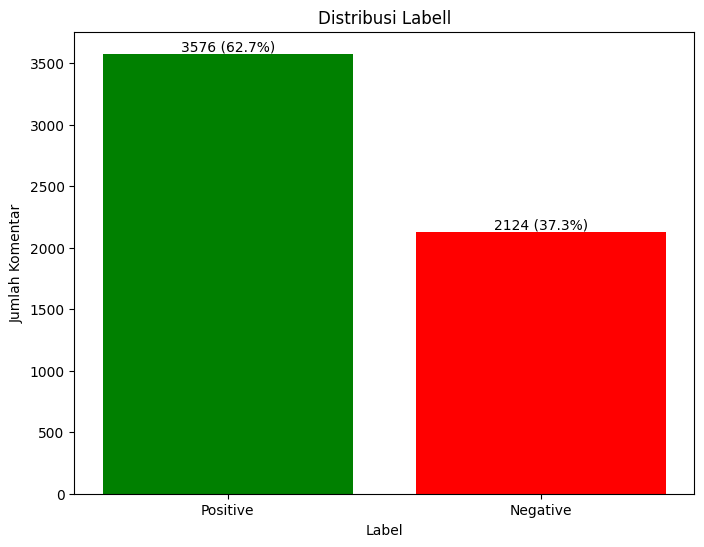

In [ ]:
# Data for the bar chart
labels = ['Positive', 'Negative']
sizes = [len(komentar_positif), len(komentar_negative)]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['green', 'red'])
plt.title('Distribusi Labell')
plt.xlabel('Label')
plt.ylabel('Jumlah Komentar')

# Add percentage labels on top of each bar
for i, v in enumerate(sizes):
    plt.text(i, v + 1, f'{v} ({100*v/total_komentar:.1f}%)', ha='center', va='bottom')

plt.show()

##Wordcloud

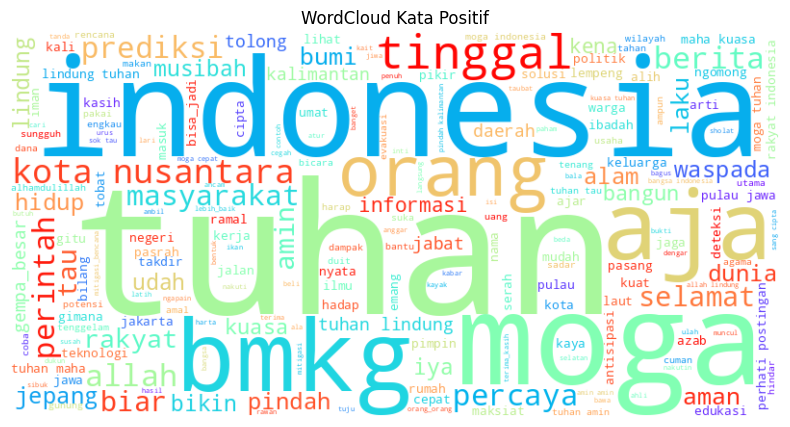

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords_set = set(stopwords.words('indonesian'))

# Pisahkan kata positif dan negatif
kata_positif = []
kata_negatif = []

for kata_list in df['hasil_merge_senticnet']:
    for kata in kata_list:
        polaritas = lexicon_dict.get(kata, 0.0)
        if polaritas >= 0:
            kata_positif.append(kata.lower())
        else :
            kata_negatif.append(kata.lower())

text_positif = ' '.join(kata_positif)
text_negatif = ' '.join(kata_negatif)

wordcloud_pos = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stopwords_set, colormap='rainbow'
).generate(text_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Kata Positif')
plt.show()

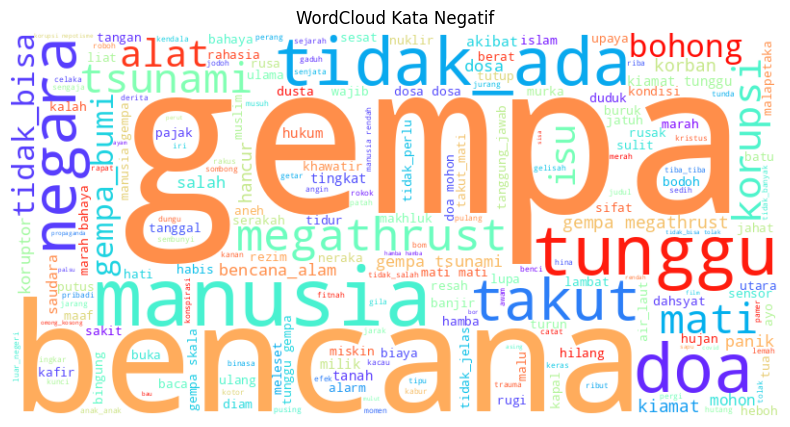

In [ ]:
wordcloud_neg = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stopwords_set, colormap='rainbow'
).generate(text_negatif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Kata Negatif')
plt.show()


In [ ]:
df = pd.read_csv('sentimen hasil labeling TA .csv')

#TF-IDF

In [ ]:
!pip install pandas scikit-learn

In [ ]:
df['hasil_merge_senticnet'] = df['hasil_merge_senticnet'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

#TF-IDF
tfidf_model = TfidfVectorizer()
X = tfidf_model.fit_transform(df['hasil_merge_senticnet'])
y = df['polarity']

In [ ]:
# Buat dataframe dari matriks TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_model.get_feature_names_out())
tfidf_df

,aba,abad,abadi,abah,abai,abang,abar,abdi,abdul,aben,...,zariah,zat,zeref,zero,zholim,zikir,zina,zionis,zolim,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# tfidf_df.to_csv('tfidf.csv', index = False)

#Split Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Jumlah data latih (X_train):", X_train.shape[0])
print("Jumlah label latih (y_train):", len(y_train))
print("Jumlah data uji (X_test):", X_test.shape[0])
print("Jumlah label uji (y_test):", len(y_test))

Jumlah data latih (X_train): 4560
Jumlah label latih (y_train): 4560
Jumlah data uji (X_test): 1140
Jumlah label uji (y_test): 1140


#SMOTETomek

In [ ]:
#SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

<ipython-input-16-1703217461>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=y_train, palette='Set2')
<ipython-input-16-1703217461>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=y_train_resampled, palette='Set3')


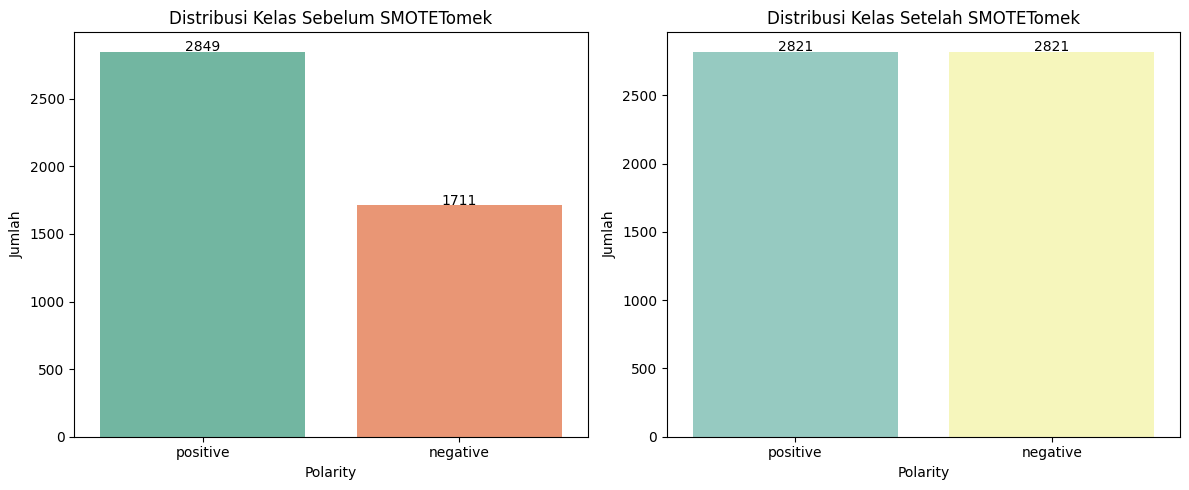

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi sebelum dan sesudah SMOTETomek
plt.figure(figsize=(12, 5))

# Sebelum SMOTETomek
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_train, palette='Set2')
plt.title("Distribusi Kelas Sebelum SMOTETomek")
plt.xlabel("Polarity")
plt.ylabel("Jumlah")

# Tambahkan label jumlah di atas bar
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center")

# Setelah SMOTETomek
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_train_resampled, palette='Set3')
plt.title("Distribusi Kelas Setelah SMOTETomek")
plt.xlabel("Polarity")
plt.ylabel("Jumlah")

# Tambahkan label jumlah di atas bar
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha="center")

plt.tight_layout()
plt.show()

#SVM

In [ ]:
# Inisiasi kernel dan parameter grid
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grids = {
    'linear': {'C': [1.0]},
    'rbf': {'C': [4], 'gamma': [0.5]},
    'poly': {'C': [2],'degree': [1]},
    'sigmoid': {'C': [1.0],'gamma': ['scale']}
}
confusion_matrices = {}  # Dictionary untuk menyimpan confusion matrix

# Proses evaluasi kernel
for kernel in kernels:
    print(f"\n=== Evaluasi SVM Kernel: {kernel.upper()} ===")

    # Ambil parameter untuk kernel saat ini
    params = param_grids[kernel]

    # Inisialisasi model dengan parameter
    model = SVC(kernel=kernel, random_state=42, **{k: v[0] for k, v in params.items()})

    model.fit(X_train_resampled, y_train_resampled)
    y_test_pred = model.predict(X_test)

    # Evaluasi
    print(f"Akurasi: {accuracy_score(y_test, y_test_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Simpan confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices[kernel] = cm


=== Evaluasi SVM Kernel: LINEAR ===
Akurasi: 0.8825
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.85      0.84       413
    positive       0.91      0.90      0.91       727

    accuracy                           0.88      1140
   macro avg       0.87      0.87      0.87      1140
weighted avg       0.88      0.88      0.88      1140


=== Evaluasi SVM Kernel: RBF ===
Akurasi: 0.8895
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.81      0.84       413
    positive       0.90      0.93      0.91       727

    accuracy                           0.89      1140
   macro avg       0.89      0.87      0.88      1140
weighted avg       0.89      0.89      0.89      1140


=== Evaluasi SVM Kernel: POLY ===
Akurasi: 0.8728
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.84      0.83       413
    positive  

##Confusion Matrix

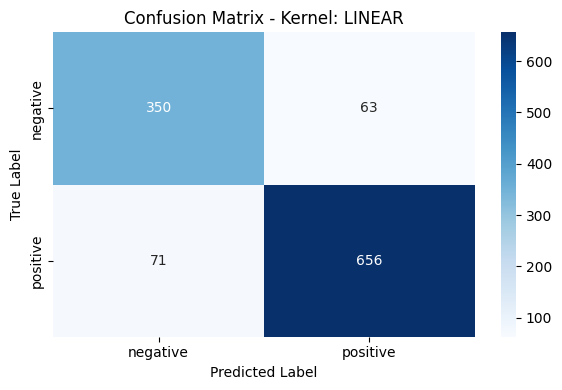

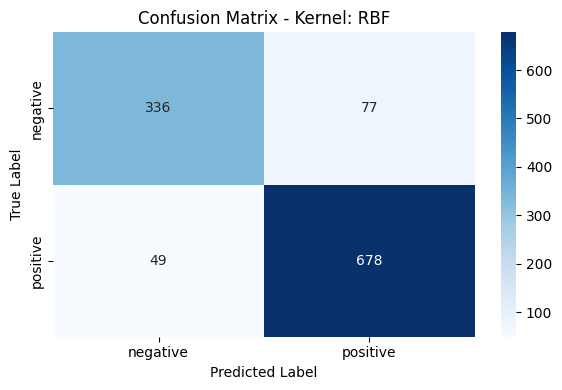

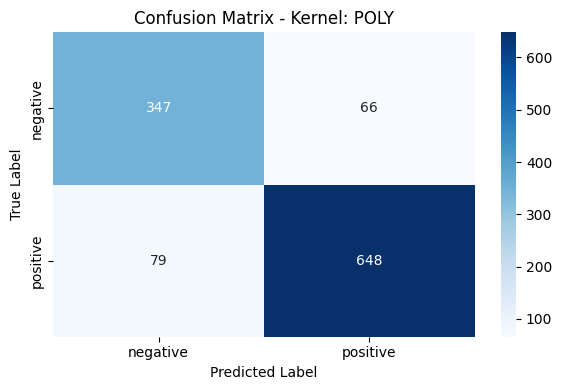

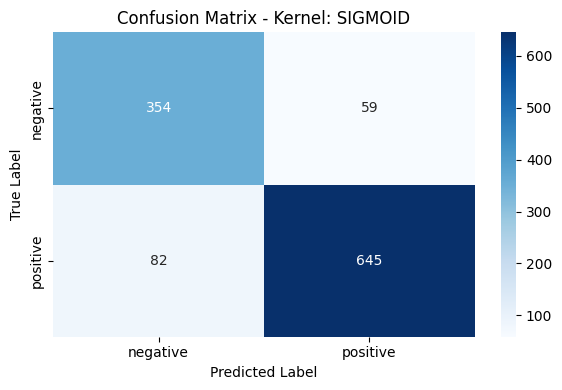

In [ ]:
#Visualisasi Confusion Matrix
for kernel, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix - Kernel: {kernel.upper()}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

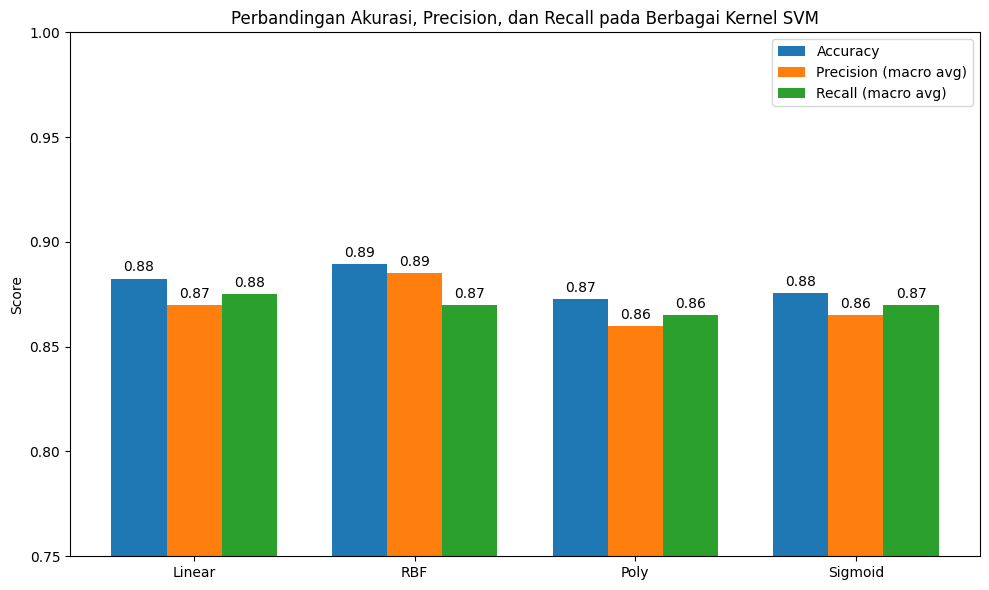

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data hasil evaluasi kernel SVM
kernels = ['Linear', 'RBF', 'Poly', 'Sigmoid']

# Akurasi Test
accuracies = [0.8825, 0.8895, 0.8728, 0.8754]

# Precision untuk kelas negative dan positive (rata-rata macro)
precision_neg = [0.83, 0.87, 0.81, 0.81]
precision_pos = [0.91, 0.90, 0.91, 0.92]
precision_macro = [(pn + pp)/2 for pn, pp in zip(precision_neg, precision_pos)]

# Recall untuk kelas negative dan positive (rata-rata macro)
recall_neg = [0.85, 0.81, 0.84, 0.86]
recall_pos = [0.90, 0.93, 0.89, 0.88]
recall_macro = [(rn + rp)/2 for rn, rp in zip(recall_neg, recall_pos)]

# Membuat plot
x = np.arange(len(kernels))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

# Bar chart per metrik
bar1 = ax.bar(x - width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x, precision_macro, width, label='Precision (macro avg)')
bar3 = ax.bar(x + width, recall_macro, width, label='Recall (macro avg)')

# Label dan judul
ax.set_ylabel('Score')
ax.set_ylim([0.75, 1.0])
ax.set_title('Perbandingan Akurasi, Precision, dan Recall pada Berbagai Kernel SVM')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Menampilkan nilai di atas bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()


#Parameter Default

In [ ]:
from sklearn.svm import SVC

# Buat objek model kosong
model = SVC()

# Tampilkan semua parameter dan nilai defaultnya
print(model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
